<h1 style="text-align: center;font-size:3em"> An introduction to gradient descent algorithms </h1>        

<h1 style="text-align: center;"> Linear Regression </h1>

<h2 style="text-align: center;"> Principle </h2>

**Linear regression** algorithms are used for prediction purposes. An affine linear model makes a prediction by simply computing a weighted sum of the input features, plus a constant called the **bias term** (or **intercept term**)

$$
\hat y = \theta_0 +\theta_1 x_1 +\theta_2 x_2 +\dots+ \theta_n x_n
 = \theta \cdot {\bf x}  = h_\theta({\bf x}).
$$

where 
$$
\theta := (\theta_0,\dots,\theta_n)^T, \quad\quad {\bf x}:=(x_0,x_1,\dots,x_n)^T,\quad x_0=1.
$$
 - $n$ is the number of features.
 - $x_i$ is the $i^{th}$ feature value.
 - $h_\theta$ is the hypothesis function, using the model parameters $\theta$.
 - $\hat y$ is the predicted value.
 

<h2 style="text-align: center;"> Loss function </h2>

The MSE loss function of a linear regression hypothesis $h_\theta$ on a training set $\{(x^{(1)},y^{(1)}),\dots,(x^{(m)},y^{(m)})\} \subset \mathbb R^n \times \mathbb R$ is calculated by

$$
J(\theta) = MSE(X,h_\theta) = \frac 1{m} \sum_{i=1}^m ( h_\theta({\bf x}^{(i)}) - y^{(i)} )^2
$$

<h2 style="text-align: center;"> Gradient computation </h2>
For $j=0,\dots,n$, the partial derivatives of $J$ with respect to $\theta_j$ is 

$$
\frac{\partial J}{\partial \theta_j}(\theta)=\frac 1m\sum_{i=1}^m 2 x_j^{(i)} ( h_\theta({\bf x}^{(i)}) - y^{(i)} )
$$

If we introduce 

$$
X := (x^{(i)}_j)_{\substack{ 1 \leq i \leq m\\  0 \leq j \leq n}}
\in {\mathbb R}^{m \times (n+1)},\quad\quad \quad 
Y :=(y^{(1)},\dots,y^{(m)})^T \in \mathbb R^m
$$

We can write $\theta \mapsto J(\theta)$ and 
$\theta \mapsto \nabla J(\theta):=
\big(\frac{\partial J}{\partial \theta_0}(\theta),\dots
\frac{\partial J}{\partial \theta_n}(\theta) \big)^T$
using matrices and vectors 

$$
J(\theta)=
\frac 1m \|X\theta-Y\|^2,\quad \quad \quad \quad 
\nabla J(\theta):=
\frac 1m
2 X^T (X\theta - Y) 
$$

<h2 style="text-align: center;"> Batch gradient descent </h2>


The **Batch gradient descent** algorithm is given by 

$$
\theta^{(0)} \mbox{ initial guess},\quad \quad\quad 
\theta^{(k+1)}= \theta^{(k)} - \eta \nabla J(\theta^{(k)})
$$

The whole **batch** $X$ of training data is used at every step.

The loss function is quadratic in $\theta$ (hence **convex**) and clearly ***L***-**smooth** with 

$$
L=\frac 2m\|X^{T}X\|_{2\to2}= \frac 2m s_1(X)^2
$$ 

where $s_1(X)$ is the largest singular value of $X$. Batch gradient descent with Learning rate $\eta<1/L$ converge to $\theta^*$ which minimizes $J$.  

Observe also that $J$ is minimized at $\theta^*$ for which $\nabla J(\theta^*)=0$. Hence,
$\theta^*$ is solution of the normal equation

$$
\theta^* =  (X^T X)^{-1} X^TY 
$$

theta_best= [[1.98331783]
 [4.97826472]]


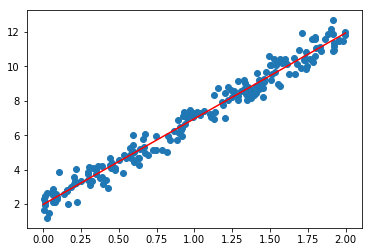

In [7]:
## Direct computation using normal equation
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
n,m = 1,200
x = 2* np.random.rand(m, n)
y = 2 + 5 * x + 0.5* np.random.randn(m, n) ## thus theta0= 2 , theta1=5
plt.scatter(x, y)
X_b = np.c_[np.ones((m, n)), x] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
plt.plot([0,2],[theta_best[0],theta_best[0]+2*theta_best[1]],color='r')
print ('theta_best=',theta_best)
plt.show()

In [8]:
## gradient descent applied to the function J: theta -> J (theta) ##
def val_f (theta):
    return (1./m)*np.linalg.norm(X_b.dot(theta) - y) 
def grad_f (theta):
    return (2./m)*X_b.T.dot(X_b.dot(theta) - y)
x0 = np.zeros((2, 1))      # The algorithm starts at x0=(0,0)

s1 = np.linalg.norm(X_b, ord=2) ## Largest singular value of X_b
L = (2/m)*s1*s1            # L for L-smoothness
rate = 1./L                # Learning rate
precision = 0.001          # This tells us when to stop the algorithm
step_size = 1              # step being taken
max_iters = 4000           # maximum number of iterations
iters = 0                  #iteration counter

vec_x,vec_f  = [],[]
cur_x = x0
while step_size > precision and iters < max_iters:
    vec_x = vec_x+[cur_x]
    vec_f = vec_f+[val_f(cur_x)]
    prev_x = cur_x                        #Store current x value in prev_x
    cur_x = cur_x - rate * grad_f(prev_x) #Gradien descent
    step_size = np.linalg.norm(cur_x - prev_x)   #Change in x
    iters = iters+1 #iteration count
print("The local minimum occurs at", vec_x[-1])
print("The local minimum is equal to", vec_f[-1])

The local minimum occurs at [[1.99344927]
 [4.96976563]]
The local minimum is equal to 0.035080866913785244


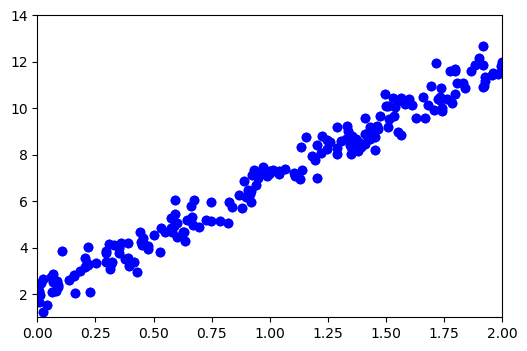

In [9]:
## Animation based on gradient descent applied for linear regression ##

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import animation, rc

#%matplotlib inline
#matplotlib notebook
#%matplotlib nbagg
%matplotlib tk

# First set up the figure, the axis, and the plot element we want to animate

fig = plt.figure()
fig.set_dpi(100)

xmin,xmax = 0, 2
fmin,fmax = 1,14

ax  = plt.axes(xlim=(xmin, xmax), ylim=(fmin, fmax))
line, = ax.plot([], [], lw=2,color='r')

# initialization function: plot the background of each frame
def init():
    plt.scatter(x, y,color='b')
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    a = [0,2]
    theta= vec_x[i] 
    b = [theta[0],theta[0]+2*theta[1]]
    line.set_data(a, b)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, 
                               animate, 
                               init_func=init,
                               frames=50, 
                               interval=50, 
                               blit=True)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html

#HTML(anim.to_html5_video())

from IPython.display import HTML
anim.save('GD_converge.mp4', fps=5, extra_args=['-vcodec', 'h264', '-pix_fmt', 'yuv420p'])
plt.show()

### Variants:  interpretability, etc
- Lasso regression
$$
J(\theta) = \frac 1m \|X\theta-Y\|^2 + \lambda \|\theta\|_1
$$
- Ridge regression
$$
J(\theta) = \frac 1m \|X\theta-Y\|^2 + \|\Gamma \theta\|^2
$$



# Pros and cons

- **Batch Gradient Descent** scales well with the number of features
However,
- **Batch Gradient Descent** can be terribly slow on very large training sets 
($\Longrightarrow$ **Gradient Descent algorithms**). 


- it is much faster to use  Gradient Descent than to use the Normal Equation for training a Linear Regression model for hundreds of thousands of features 

<h1 style="text-align: center;"> Stochastic Gradient Descent </h1>

We are interested in minimizing the **additive** loss function  

$$
J(\theta) = \sum_{i=1}^m J_i(\theta),\quad\quad\quad J_i(\theta):= ( h_\theta({\bf x}^{(i)}) - y^{(i)} )^2
$$

One random instance $\{(x^{(\omega)},y^{(\omega)})\}$ in the training set is picked at every step $k$ and the gradient is computed based only on this instance. This gradient is $\nabla J_\omega(\theta) = \nabla_\theta J_\omega(\theta)$ and is equal to

$$
\nabla J_\omega(\theta):=
2 (h_\theta({\bf x}^{(\omega)}) - y^{(\omega)}) {\bf x}^{(\omega)}.
$$

The **Stochastic Gradient Descent** (SGD) algorithm for MSE minimization in linear regression is given by 

$$
\theta^{(0)} \mbox{ initial guess},\quad \quad\quad  
\left\{\begin{array}{}
{\omega} \mbox{ randomly selected in} \{1,2,\dots,n\} \\
\theta^{(k+1)}= \theta^{(k)} - \eta \nabla J_{\omega}(\theta^{(k)})
\end{array}
\right.
\quad\quad\quad k\geq0.
$$

Only one random instance $\{(x^{(\omega)},y^{(\omega)})\}$ of training data $X$ is used at every step.

- Every step $k$ of the algorithm is much faster. 
- This makes it possible to train on large training sets.


In [10]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters
def learning_schedule(t): 
    return t0/(t+t1)
    
theta = np.random.randn(2,1) # random initialization
for epoch in range(n_epochs): 
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        
print(theta)

[[1.97779774]
 [4.97149486]]


In [11]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1) 
sgd_reg.fit(x, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_ 

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


(array([1.97771021]), array([4.960105]))

### Variant

- Mini-batch SGD
- Momentum 
- Nesterov accelerated gradient
- Adagrad / Adadelta / RMSprop / Adam / AdaMax / Nadam

In [12]:
from IPython.display import IFrame
IFrame(src='https://arxiv.org/pdf/1609.04747.pdf', width=700, height=600)

<h1 style="text-align: center;"> Logistic Regression </h1>

<h2 style="text-align: center;"> Principle </h2>

**Logistic Regression** (also called **Logit Regression**) algorithms are used for **binary classification**.
The model estimates the probability that an instance belongs to one of two classes (**{0,1}** or **{Y,N}** or **{+,-}** etc) and predicts for the instance the class with the highest probability.



In logistic regression, the model estimate a parameter 
$\theta= (\theta_0,\theta_1,\dots,\theta_n)^T\in {\mathbb R}^{n+1}$, and predicts 
a class in **{0,1}** according to

$$
\hat y = 
\left\{
\begin{array}{cc}
0 \quad \mbox{if}\quad \sigma(\theta.{\bf x})<0.5 \\
1 \quad \mbox{if}\quad \sigma(\theta.{\bf x})\geq 0.5
\end{array}
\right.
$$
where $\sigma$ is the sigmoid function. 

<p style="text-align: center;font-weight:bold;"> 
The number $\hat p:=\sigma(\theta.{\bf x})\in ]0,1[$ is an estimated
probability that $x$ belongs to class $1$. 
</p>

<h2 style="text-align: center;"> Logistic function </h2>  
<br/>
<img src="sigmoid_function.svg" style='margin:auto' width= 60%  />

<!--
<div>
    <div style="float: left; width: 25%;">
    <div style="text-align:center;margin-top:50%;">
$$\sigma(t) = \frac {1}{1+e^{-t}} \in ]0,1[,\quad t\in{\mathbb R}$$
    </div>
    </div>
    <div style="  float: left;width: 75%;">
<img src="sigmoid_function.svg" width= 80%  />
    </div>
</div>
-->


Observe:  
<div style='text-align:center;'>
&#9679;   $\sigma(\theta\cdot{\bf x})\geq0.5$ if and only if $\theta \cdot {\bf x}\geq 0$. <br/>
&#9679;   $\sigma(\theta\cdot{\bf x})\lt0.5$ if and only if $\theta \cdot {\bf x} \lt 0$. 
</div>

Observe:  
$$
\sigma'(t) = \sigma(t) (1- \sigma(t))
$$

<h2 style="text-align: center;"> Loss function </h2>
We introduce 

$$
\hat p=h_\theta(x)=\sigma(\theta. {\bf x})=\sigma(\theta_0+\theta_1 x_1+\dots+\theta_n x_n)
$$

then 

$$
c(\theta)=\left\{\begin{array}{l}- \log(\hat p)\quad &\quad y=1\\- \log(1- \hat p)\quad &\quad y=0\\
\end{array}
\right.
\quad\quad
\equiv 
\quad\quad
c(\theta)
=-\bigg[\log(\hat p) y+ \log(1- \hat p) (1-y)\bigg]
$$

This cost function is intuitive 
- $-\log(p)=\log(1/p)$ grows very large when $p$ approaches $0$. The cost (penality) is large if the model estimates a probability close to $0$ for instance in class $1$.


- $-\log(1-p)=\log(1/(1-p))$ is close to $0$ when $p$ approaches $0$. The cost (penality) is small if the model estimates a probability close to $0$ for instance in class $0$.


- Same observation if $p$ approaches $1$.


Given a training set $\{(x^{(1)},y^{(1)}),\dots,(x^{(m)},y^{(m)})\} \subset \mathbb R^n \times \mathbb \{0,1\}$. 
The **loss function** is given by 

$$
J(\theta) = \frac 1{m} \sum_{i=1}^m c^{(i)}(\theta),\quad\quad\quad c^{(i)}(\theta)=-\bigg[\log(\hat p^{(i)}) y^{(i)} + \log(1- \hat p^{(i)}) (1-y^{(i)})\bigg]
$$

<h2 style="text-align: center;"> Gradient computation </h2>

Given $c(\theta) =-\big[\log(\hat p) y+ \log(1- \hat p) (1-y)\big]$, observe

$$
\frac {\partial c }{\partial \theta_j}
=\frac {\partial c }{\partial \hat p }\frac {\partial \hat p }{\partial (\theta.{\bf x})}\frac {\partial (\theta.{\bf x})}{\partial \theta_j  }
=\frac {\partial c }{\partial \hat p }\;\sigma'(\theta.{\bf x})\;x_j
$$

We have 

$$
\frac {\partial c }{\partial \hat p } = -\bigg[\frac 1 {\hat p} y -  \frac 1{1- \hat p} (1-y)\bigg]\quad\quad\sigma'(\theta.{\bf x})\;= \sigma (\theta.{\bf x}) (1-\sigma(\theta.{\bf x})) = \hat p (1- \hat p) 
$$

Finally

$$
\frac {\partial c }{\partial \theta_j}=-\bigg[(1- \hat p) y - \hat p (1-y)\bigg]x_j=\big[ \hat p -y \big]x_j
$$

<h3 style="text-align: center;"> Chain rule: seed to Back-propagtion algorithms </h3> 

The partial derivatives of $J$ are given by 
$$
\frac {\partial J(\theta) }{\partial \theta_j}=\frac 1{m} \sum_{i=1}^m \frac {\partial c^{(i)}(\theta) }{\partial \theta_j}=\frac 1{m} \sum_{i=1}^m \big[ \sigma(\theta.{\bf x}^{(i)})-y^{(i)} \big]\;x_j^{(i)}
$$


### Decision Boundaries for the iris flower dataset

<img src="https://s3.amazonaws.com/media-p.slid.es/uploads/633656/images/6079473/iris-machinelearning.png" style="" data-natural-width="1275" data-natural-height="477"/>


In [13]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [14]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


NameError: name 'save_fig' is not defined

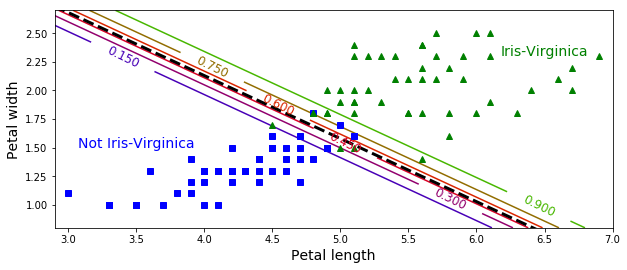

In [15]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
                    np.linspace(2.9, 7, 500).reshape(-1, 1),
                    np.linspace(0.8, 2.7, 200).reshape(-1, 1),
)
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
save_fig("logistic_regression_contour_plot")
plt.show()

<h1 style="text-align: center;"> Soft-max regression </h1>

<h2 style="text-align: center;"> Principle </h2>

Soft-max regression generalizes logistic regression in order to support $K$ classes. The model estimates a **parameter matrix**

$$
\Theta = [\Theta_1|\Theta_2\dots|\Theta_K]^T\in {\mathbb R}^{K \times (n+1)},\quad\quad
\Theta_k =(\Theta_{0,k},\Theta_{1,k},\dots,\Theta_{n,k} )^{T}.
$$

Given $x\in{\mathbb R}^n$ and ${\bf x} = (1,x) \in {\mathbb R}^{n+1}$, we compute 
$z=\Theta {\bf x}~$ ( i.e. $z_j=\Theta_j. {\bf x}$  for every $j=1,\dots,K$), then compute
the $K$ probabilities 

$$
\hat p_k = \frac {\exp({z_k})}{\displaystyle\sum_{j=0}^K \exp({z_j})},\quad\quad k=1,\dots,K.
$$

<div style="text-align: center;font-weight:bold;"> The class predicted for $x$ is 
the class $k$ with the highest probabilities $ \hat p_k$. </div> 


<h2 style="text-align: center;"> Example: Decision Boundaries for the iris flower dataset </h2>

<img style='margin:auto;' src='softmax_iris.svg'/>

<h2 style="text-align: center;"> Loss function </h2>

Given a training set $\{(x^{(1)},y^{(1)}),\dots,(x^{(m)},y^{(m)})\} \subset \mathbb R^n \times \mathbb \{1,2,\dots,K\}$, the model minimizes a **suitable loss function** in order to find the best parameter matrix $\Theta^*$. Given $\{{ x}^{(i)},{ y}^{(i)}\} $, the associated individual loss is given by 

$$
c^{(i)}(\Theta)= - \log (\hat p_k^{(i)}),
\quad\quad \mbox{if}\quad\quad
y^{(i)} = k. 
$$

Intuitively, given $y^{(i)}$ belongs to class $k$
- we want $\hat p_k^{(i)}$ to be close to $1$ (so that $\hat p_k^{(i)}$ is the highest probability).  
- the closer $\hat p_k^{(i)}$ is to $0$ (i.e. the more certain that a miss-classification occurs), the larger is the loss (penalization) $c^{(i)}(\Theta)$.

Then the loss function for the whole training set is given by 

$$
J(\Theta)= \frac 1{m} \sum_{i=1}^m c^{(i)}(\Theta)=- \frac 1{m} \sum_{i=1}^m  \log (\hat p_{y(i)}^{(i)}).
$$



<h5 style="text-align: center;"> We will view the function $J$ as a function of $(\Theta_1,\Theta_2,\dots,\Theta_K)$.</h5> 

<h2 style="text-align: center;"> Gradient computation </h2>

We Let $\theta = \Theta_{j} \in \mathbb R^{n+1}$ for some $j\in \{1,\dots,K\}$: We have the following **function dependency diagram** 

$$
\Theta \longrightarrow (z^{(i)}_l)_{\substack{i=1,\dots,m\\l=1,\dots,K}} \longrightarrow J.
$$

Using **chain rule** with respect to the intermediates variables and $\nabla_{\theta} z_l = \delta_{j,l}{\bf x}$ which follows from $z_l=\Theta_l. {\bf x}$, one has  

$$\nabla_{\theta}  J(\Theta)=\sum_{i=1}^m \sum_{l=1}^K\frac {\partial  J(\Theta)}{\partial z_l^{(i)}}\nabla_{\theta}  z_l^{(i)}=\sum_{i=1}^m \frac {\partial  J(\Theta)}{\partial z_j^{(i)}}{\bf x}^{(i)}$$

In view of the formula for $J$
$$
 \frac {\partial  J(\Theta)}{\partial z_j^{(i)}}=
-\frac 1m \frac {\partial  \log(\hat p_k^{(i)})}{\partial z_j^{(i)}}
$$

By derivation of usual functions, one has 

$$\frac {\partial  \log(\hat p_k)}{\partial z_j} =\frac 1{\hat p_k} \frac {\partial \hat p_k}{\partial z_j}
=
\frac 1{\hat p_k}
\left\{
\begin{array}{ll}
\hat p_k - (\hat p_k)^2&\quad \mbox{if}\quad j=k 
\\
- \hat p_k \hat p_j &\quad \mbox{if}\quad j\neq k
\end{array}
\right.
=
\left\{
\begin{array}{ll}
1 - \hat p_k&\quad \mbox{if}\quad j=k 
\\
- \hat p_j &\quad \mbox{if}\quad j\neq k
\end{array}
\right.
$$  

The combination of the previous formulas implies

$$
\nabla_{\theta} J(\Theta) = -  \frac 1m \sum_{i=1}^m ({\mathbb 1}_{y^{(i)}=j} - \hat p_j^{(i)}) {\bf x}^{(i)}
\quad\quad\quad\quad
\nabla_{\theta} J(\Theta)
\in {\mathbb R}^{n+1}
$$

<!--
<h5 style="text-align: center;"> Observe that the gradient $\nabla_{\theta}z_l$ is equal to $0$, except if $l=j$, it is equal to $\bf x$.</h5> 
-->

The function $J$ as a function of $(\Theta_1,\Theta_2,\dots,\Theta_K)$ satisfies

$$
\nabla_{\Theta_j} J(\Theta) = -  \frac 1m \sum_{i=1}^m ({\mathbb 1}_{y^{(i)}=j} - \hat p_j^{(i)}) {\bf x}^{(i)}.
$$

Finally 

$$
\nabla_{\Theta} J(\Theta) = [\nabla_{\Theta_1} J(\Theta) |\nabla_{\Theta_2} J(\Theta) |\dots|\nabla_{\Theta_k} J(\Theta) ]^T\in {\mathbb R}^{K \times (n+1)}.
$$

- Batch gradient descent;
- stochastic gradient descent;
- mini-Batch stochastic gradient descent;

can all be implemented.

NameError: name 'save_fig' is not defined

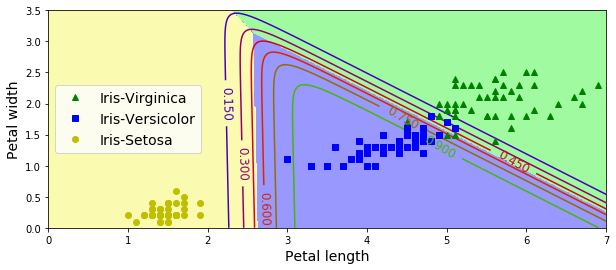

In [17]:
X = iris["data"][:, (2, 3)]  # petal length, petal width, mainly for visualisation
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

#softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
#softmax_reg.fit(X, y)
    
x0, x1 = np.meshgrid( np.linspace(0, 8, 500).reshape(-1, 1),
                     np.linspace(0, 3.5, 200).reshape(-1, 1),)
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
save_fig("softmax_regression_contour_plot")
plt.show()

<h1 style="text-align: center;"> Summary   </h1>


How do we **learn** the "best" weights vector $(\theta_0^*,\dots,\theta_n^*)$ or matrix $(\Theta_0^*|\dots|\Theta_n^*)$ in linear/logistic/soft-max regression
<br>
<br>


<div style="float:left;" >
    <span data-fragment-index="1" style="font-size:1.3em">Gradient Descent Algorithms</span>
<img data-natural-width="600" width="300" style="right:0;top:10%;float:right;" data-lazy-loaded="" src="https://s3.amazonaws.com/media-p.slid.es/uploads/655061/images/3516655/sgd_contour.gif"/>
<ul>
            <li class="fragment" data-fragment-index="1">
                Give weights random initial values
            </li>
            <br>
            <li class="fragment" data-fragment-index="2">
                Evaluate partial derivative of each weight with respect to <strong>MSE</strong> or <strong>negative log-likelihood</strong> at current weight value
            </li>
            <br>
            <li class="fragment" data-fragment-index="3">
               Take a step in direction opposite to the gradient 
            </li>
            <br>
            <li class="fragment" data-fragment-index="4">
                <span >Rinse and repeat</span>
            </li>
            <br>
        </ul>
</div>


<p style='text-align:center; font-size:1.4em'>
Essence of the entire learning process behind deep learning algorithms
<p>

<h1 style="text-align: center;"> Neural network and backpropagation  </h1>

<h2 style='text-align:center'>
    MULTILAYER PERCEPTRONS (MLPs)
</h2>
<img width="500" style="margin:auto;text-align:center" data-lazy-loaded="" src="https://s3.amazonaws.com/media-p.slid.es/uploads/655061/images/3516930/neural_net2.jpg"/>

<ul>
    <li class="fragment" data-fragment-index="1">
        Most generic form of a neural net is the "multilayer perceptron"
    </li>
    <li class="fragment" data-fragment-index="2">
              Input undergoes a series of nonlinear transformation 
    </li>
    <li class="fragment" data-fragment-index="3">
       A final classification layer</span>
    </li>
</ul>


<ul>
    <li class="fragment" data-fragment-index="4">
        MLPs are easy entry to understand deep learning models
        </li>
    <li class="fragment" data-fragment-index="5">
                Closely related to logistic regression
    </li>
 </ul>

<h2 style="text-align: center;"> Principle </h2>

We consider classification problem for **iris dataset** using neural network with one **hidden layer** (5 nodes) 
and **activation function** $\varphi$ (sigmoid, relu, etc)
<br>

<div>
<img width="350" style=" float:right;" src= 'dnn_1hidden.svg'/>

- Input layer $$x=(x_1,x_2,x_3,x_4)^T.$$

- Hidden layer  
$$h = (h_1,h_2,h_3, h_4,h_5)^T.$$

- Output layer 
$$z = ( z_1, z_2, z_3)^T.$$

With bias in input and hidden layer $x_0 = 1, h_0=1$, we denote

$$
{\bf x} = (1,x^T)^T,\quad\quad\quad
{\bf h} = (1,h^T)^T
$$


</div>

<img width="800" style=" margin:auro" src= 'dnn_1hidden_details.svg'/>


<h2 style="text-align: center;"> Loss function </h2>

Given a training set $\{(x^{(1)},y^{(1)}),\dots,(x^{(m)},y^{(m)})\} \subset \mathbb R^n \times \mathbb \{1,2,\dots,K\}$ ($n=4$ and $K=3$ for iris dataset), the model minimizes the **negative log-likelihood** as for Soft-Max
regression in order to find the best parameter matrices $\widetilde\Theta^*$ and $\Theta^*$. 
The loss function for the whole training set is given by 

$$
J(\widetilde\Theta,\Theta) = 
-  \frac 1{m} \sum_{{i=1}}^m \log (\hat p_k^{(i)}),\quad\quad\quad (k \mbox{ is such that } y^{(i)} \mbox{ belongs to class } k)
$$


If $n_h$ is the number of nodes in the hidden layer (here $n_h=5$), we write

$$
\widetilde\Theta = [\widetilde\Theta_1|\widetilde\Theta_2\dots|\widetilde\Theta_{n_h}]^T\in {\mathbb R}^{n_h \times (n+1)},\quad\quad
\Theta = [\Theta_1|\Theta_2\dots|\Theta_K]^T\in {\mathbb R}^{K \times (n_h+1)},\quad\quad
$$

<h5 style="text-align: center;"> We will view the function $J$ as a function of $(\widetilde\Theta_1,\widetilde\Theta_2,\dots,\widetilde\Theta_{n_h},\Theta_1,\Theta_2,\dots,\Theta_K)$.</h5> 

<h2 style='text-align:center'>
   But how do we compute gradients, with respect to the $\Theta_j$ and $\widetilde\Theta_j$
</h2>

We recall the **mapping diagram** 

$$
{\bf x} \quad\Longrightarrow\quad h^{-} = \widetilde \Theta {\bf x} \quad\Longrightarrow\quad h = \varphi(h^{-}) \quad\Longrightarrow\quad z=\Theta {\bf h}    
$$
 
and the **function dependency diagram** 

$$
(\widetilde \Theta, \Theta) \longrightarrow ({h^{-}_j}^{(i)})_{\substack{i=1,\dots,m\\j=1,\dots,n_h}} \longrightarrow ({h_j}^{(i)})_{\substack{i=1,\dots,m\\j=1,\dots,n_h}}  \longrightarrow (z^{(i)}_l)_{\substack{i=1,\dots,m\\l=1,\dots,K}} \longrightarrow J.
$$

- For $j=1,\dots,K$, we proceed as in soft-max regression (but with $h$ as input)
$$\nabla_{\Theta_j}  J =\sum_{i=1}^m \frac {\partial  J}{\partial z_j^{(i)}}{\bf h}^{(i)} = -  \frac 1m \sum_{i=1}^m ({\mathbb 1}_{y^{(i)}=j} - \hat p_j^{(i)}) {\bf h}^{(i)}.
$$
Observe dependance on $\widetilde\Theta$  through the ${\bf h}^{(i)}$ then on $\Theta$ through the $\hat p_k^{(i)}$.




- For $j = 1,\dots,n_h$ and $\tilde\theta = \widetilde\Theta_{j}$, we proceed as in soft-max regression: **chain rule** with variables $({h_j^{-}}^{(i)})_{\substack{i=1,\dots,m\\j=1,\dots,n_h}}$ and $h^{-} = \widetilde \Theta {\bf x}$ implies 
$$\nabla_{\tilde\theta} J= \sum_{i=1}^m \sum_{l=0}^{n_h}\frac {\partial J}{\partial {h_l^{-}}^{(i)}} \nabla_{\tilde\theta} {h_l^{-}}^{(i)}= \sum_{i=1}^m \frac {\partial J}{\partial {h_j^{-}}^{(i)}} {\bf x}^{(i)}.
$$
Then $\frac {\partial J}{\partial {h_j^{-}}^{(i)}} =\frac {\partial J}{\partial h_j^{(i)}} \sigma'({h_j^{-}}^{(i)})$ and
$$
\frac {\partial J}{\partial h_j^{(i)}} 
= \sum_{l=1}^K \frac {\partial J}{\partial z_l^{(i)}} \frac {\partial z_l^{(i)}}{\partial h_j^{(i)}}
= \sum_{l=1}^K \frac {\partial J}{\partial z_l^{(i)}} \Theta_{j,l}.
$$

<h5 style="text-align: center;"> The gradients $\nabla_{\Theta} J$ and $\nabla_{\widetilde\Theta} J$ are completely determined knowing 
    $$
    {\partial  J}/{\partial z_j^{(i)}} \quad\quad i=1,\dots,m,\quad j=1,\dots k \\
    {\partial  J}/{\partial h_j^{(i)}} \quad\quad i=1,\dots,m,\quad j=1,\dots n_h
    $$
</h5>

- Batch gradient descent;
- stochastic gradient descent;
- mini-Batch stochastic gradient descent;

can all be implemented.

## Backpropagation##
<img width="500" style=" margin:auro" src= 'back_prop.svg'/>



<!--
Given training set $\{(x^{(1)},y^{(1)}),\dots,(x^{(m)},y^{(m)})\} \subset \mathbb R^n \times \mathbb R$, we let 
$$
{\bf x}^{(i)} = (1,{ x}^{(i)}) \in {\mathbb R}^{n+1},\quad\quad
{\bf z}^{(i)} = (1,{ z}^{(i)}),\quad\quad
{\bf \tilde z}^{(1)} = {\tilde z}^{(i)},\quad\quad
$$
and

$$
X=
\left[
\begin{array}{c}
{\bf x}^{(1)} \\
\hline
{\bf x}^{(2)} \\
\hline
\vdots\\
\hline
{\bf x}^{(m)}
\end{array}
\right],\quad\quad 
Z=
\left[
\begin{array}{c}
{\bf z}^{(1)} \\
\hline
{\bf z}^{(2)} \\
\hline
\vdots\\
\hline
{\bf z}^{(m)}
\end{array}
\right]
\quad\quad 
\tilde Z=
\left[
\begin{array}{c}
{\bf \tilde z}^{(1)} \\
\hline
{\bf \tilde z}^{(2)} \\
\hline
\vdots\\
\hline
{\bf \tilde z}^{(m)}
\end{array}
\right]
$$
-->

<!--
Then 
$$
{\bf Z} = relu(X.W ),\quad\quad \quad W \in {\mathbb R}^{4\times4},
$$
and
$$
{\bf \tilde Z} = relu(Z.\tilde W ),\quad\quad \quad \tilde W \in {\mathbb R}^{5\times4},
$$
Here $relu$ is vectorial 
$$
relu(v) = (relu(v_1),\dots, relu(v_k)),\quad\quad
v = (v_1,\dots, v_k) 
$$
-->



$$
J(\theta)=-\frac{1}{m} \sum_{i=1}^{m}\left[y^{(i)} \log \left(h_{\theta}\left(x^{(i)}\right)\right)+\left(1-y^{(i)}\right) \log \left(1-h_{\theta}\left(x^{(i)}\right)\right)\right]+\frac{\lambda}{2 m} \sum_{j=1}^{n} \theta_{j}^{2}
$$

$$
J(\Theta)=-\frac{1}{m} \sum_{i=1}^{m} \sum_{k=1}^{K}\left[y_{k}^{(i)} \log \left(\left(h_{\Theta}\left(x^{(i)}\right)\right)_{k}\right)+\left(1-y_{k}^{(i)}\right) \log \left(1-\left(h_{\Theta}\left(x^{(i)}\right)\right)_{k}\right)\right]+\frac{\lambda}{2 m} \sum_{l=1}^{L-1} \sum_{i=1}^{s_{l}} \sum_{j=1}^{s t+1}\left(\Theta_{j, i}^{(l)}\right)^{2}
$$

Training a Neural Network

- Randomly initialize the weights
- Implement forward propagation to get $hΘ(x(i))$ for any $x^{(i)}x$ 
- Implement the cost function
- Implement backpropagation to compute partial derivatives
- Use gradient checking to confirm that your backpropagation works. Then disable gradient checking.
- Use gradient descent or a built-in optimization function to minimize the cost function with the weights in theta.

<h2 style="text-align: center;"> some tensorflow code  </h2>

In [18]:
import tensorflow as tf
with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X, n_hidden1, "hidden1", activation="relu") 
    hidden2 = neuron_layer(hidden1, n_hidden2, "hidden2", activation="relu") 
logits = neuron_layer(hidden2, n_outputs, "outputs")

ModuleNotFoundError: No module named 'tensorflow'

<h1 style='text-align:center'>
    References
</h1>

https://www.oreilly.com/library/view/hands-on-machine-learning/9781491962282/
